In [346]:
import numpy as np

In [347]:
import matplotlib.pyplot as plt

In [348]:
x = np.arange(100)
y = np.arange(100)
xy = np.meshgrid(x, y)
xy = np.stack(xy, axis=-1)

In [349]:
xy.shape

(100, 100, 2)

In [350]:
# vertices = np.array([[20, 60], [55, 20], [80, 45], [55, 35]])


# vertices = np.array([[80, 45], [20, 60], [55, 20], [55, 70]])
# vertices = np.array([[20, 60], [55, 20], [80, 35], [95, 35], [55, 70]])
# vertices = np.array([[20, 60], [55, 20], [80, 20], [95, 35], [55, 70]])
vertices = np.array([[20, 60], [30, 40], [55, 20], [70, 20], [80, 25], [95, 35], [70, 60], [55, 70]])

In [351]:
img = np.zeros((100, 100))
for i,v in enumerate(vertices):
    img[v[1]-i-1:v[1]+i+1, v[0]-i-1:v[0]+i+1]= 1

In [352]:
pos_mean = vertices.mean(axis=0, keepdims=True)
print(pos_mean)
pos_ = pos_mean.astype(int)
img[pos_[0, 1], pos_[0, 0]] = 2

[[59.375 41.25 ]]


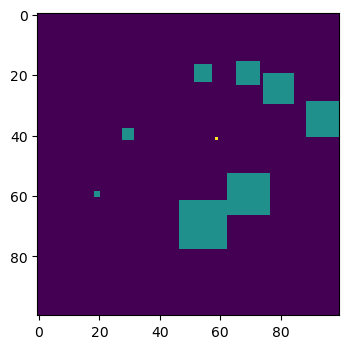

In [353]:
fig = plt.figure(dpi=100)
plt.imshow(img)

In [354]:
directions = vertices - pos_mean

In [355]:
directions

array([[-39.375,  18.75 ],
       [-29.375,  -1.25 ],
       [ -4.375, -21.25 ],
       [ 10.625, -21.25 ],
       [ 20.625, -16.25 ],
       [ 35.625,  -6.25 ],
       [ 10.625,  18.75 ],
       [ -4.375,  28.75 ]])

In [356]:
hypotennuse = np.linalg.norm(directions, axis=-1)

In [357]:
angles = np.arctan2(directions[:, 0], directions[:, 1])

In [358]:
# a = []
# b = []
# for i in range(4):
#     for j in range(4):
#         if i != j:
#             a.append(i)
#             b.append(j)

# a = [0,1,2,3,4]

# b = [1,2,3,4,0]

In [359]:
a = np.argsort(angles)[::-1]
b = np.roll(a, -1)

In [360]:
a

array([3, 4, 5, 6, 7, 0, 1, 2])

In [361]:
b

array([4, 5, 6, 7, 0, 1, 2, 3])

In [362]:
angles[a]

array([ 2.67794504,  2.23810246,  1.74446753,  0.51554901, -0.15101534,
       -1.12637712, -1.61332386, -2.93854744])

In [363]:
cross_ref = directions[a] * directions[b, ::-1] * np.array([[1, -1.]])

In [364]:
cross_ref

array([[-172.65625,  438.28125],
       [-128.90625,  578.90625],
       [ 667.96875,   66.40625],
       [ 305.46875,   82.03125],
       [ -82.03125, 1132.03125],
       [  49.21875,  550.78125],
       [ 624.21875,   -5.46875],
       [  92.96875,  225.78125]])

In [365]:
cross_ref = cross_ref.sum(axis=-1)

In [366]:
cross_ref

array([ 265.625,  450.   ,  734.375,  387.5  , 1050.   ,  600.   ,
        618.75 ,  318.75 ])

In [367]:
score = xy - vertices[:, None, None, :]

In [368]:
score.shape

(8, 100, 100, 2)

In [369]:
xy.shape

(100, 100, 2)

In [370]:
score = vertices[:, None, None, :] - xy
score = score[a] * score[b, :, :, ::-1] * np.array([1, -1])
# score = 1/(1+ np.exp(np.sign(score.sum(axis=-1)).sum(0)*-5))
# score = (np.sign(score.sum(axis=-1)) * np.sign(cross_ref[:, None, None])).sum(0)
score = (np.sign(score.sum(axis=-1))).sum(0)


In [371]:
score

array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [4, 4, 6, ..., 2, 2, 2],
       [4, 5, 6, ..., 2, 2, 2],
       [4, 6, 6, ..., 2, 2, 2]])

In [372]:
score.max()

8

In [373]:
score.min()

-2

In [374]:
import seaborn as sns


In [ ]:
# score_exp = np.exp((score-score.max()-0.5))
score_exp = np.power(10., score)
# score_exp = np.exp(np.log(10)*(score - score.max()))
score_exp = (score_exp - score_exp.min()) / (score_exp.max() - score_exp.min())


<AxesSubplot:ylabel='Count'>

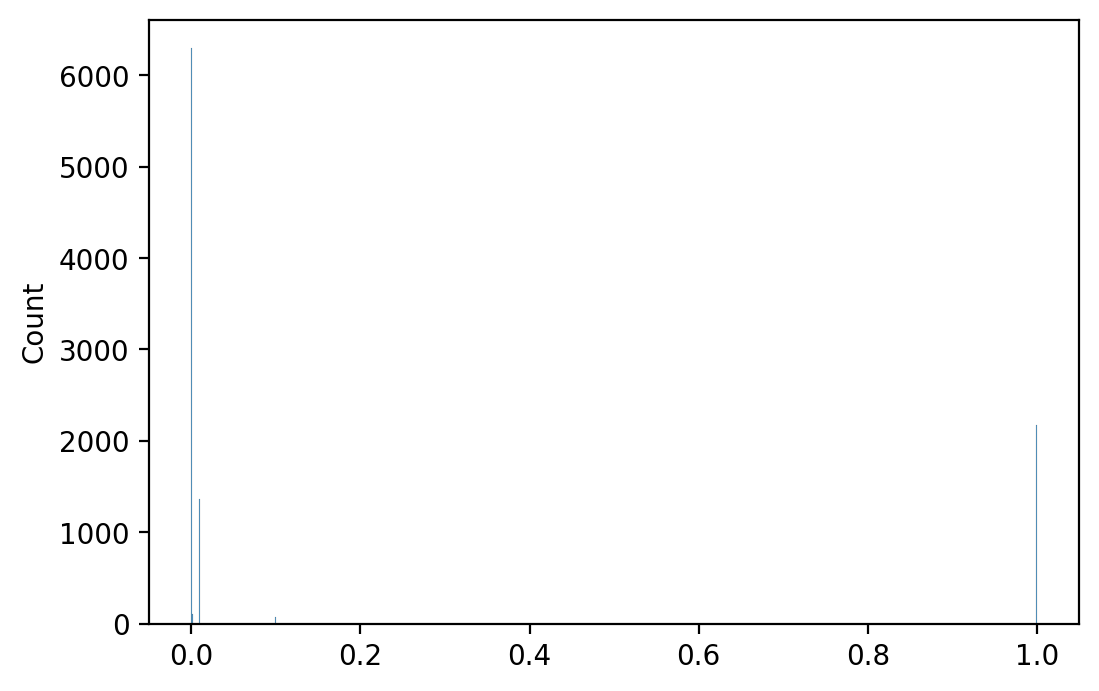

In [379]:
fig = plt.figure(dpi=200)
sns.histplot(score_exp.reshape(-1))

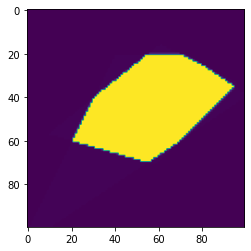

In [378]:
plt.imshow(score_exp)